# Exploratory Data Analysis (EDA)

### 1. Importing the libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### 2. Loading data

In [81]:
df = pd.read_csv("../data/raw/boston.csv")
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##### Input features
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

### 3. Checking datatypes

In [82]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### 4. Checking for duplicates

In [83]:
df.shape

(506, 14)

In [84]:
dupe_rows_df = df[df.duplicated()]
print("number of duplicated rows:", dupe_rows_df.shape)

number of duplicated rows: (0, 14)


### 5. Checking for missing or null values

In [85]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### 6. Detecting Outliers

<Axes: xlabel='CRIM'>

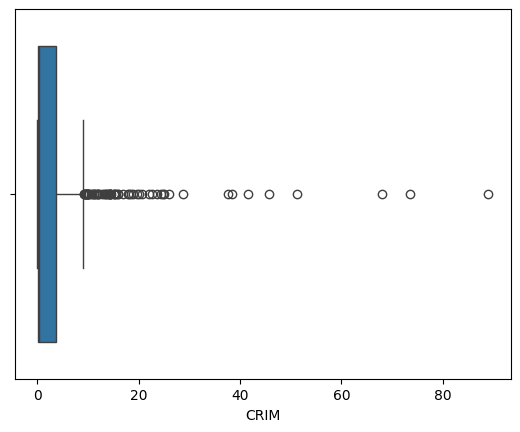

In [86]:
sns.boxplot(x=df['CRIM'])

#### Removing outliers using the IQR score technique

##### IQR score technique
1) Order the data: Arrange your dataset from the lowest to highest value.
2) Find the quartiles:
- First Quartile ($$Q_1$$): The value below which 25% of the data falls.
- Third Quartile ($$Q_3$$): The value below which 75% of the data falls.
3) Calculate the Interquartile Range (IQR): $$IQR = Q_3 - Q_1$$
4) Calculate the fences:
- Lower Fence: $$Q_1 - (1.5 \times IQR)$$
- Upper Fence: $$Q_3 + (1.5 \times IQR)$$
5) Identify Outliers:
- Any data point below the Lower Fence or above the Upper Fence is considered an outlier.


In [87]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
MEDV         7.975000
dtype: float64


In [88]:
# Exclude 'CHAS' from outlier removal as it is a binary variable
cols_to_filter = df.columns[df.columns != 'CHAS']

Q1 = df[cols_to_filter].quantile(0.25)
Q3 = df[cols_to_filter].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers only on the selected columns
df = df[~((df[cols_to_filter] < (Q1 - 1.5 * IQR)) | (df[cols_to_filter] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(288, 14)

### 7. Plotting

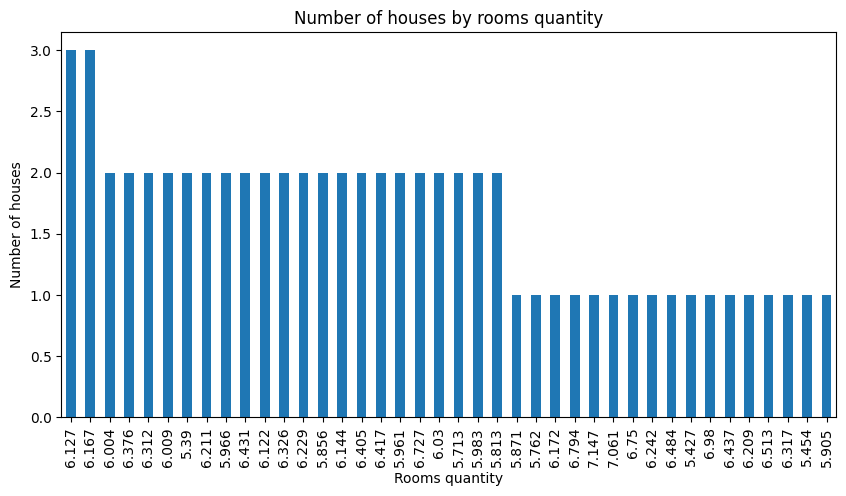

In [89]:
df.RM.value_counts().nlargest(40).plot(kind='bar', figsize=(10, 5))
plt.title("Number of houses by rooms quantity")
plt.ylabel("Number of houses")
plt.xlabel("Rooms quantity")
plt.show()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.210298,0.506252,0.060150,0.640895,-0.060011,0.352699,-0.394660,0.893373,0.807501,0.246332,-0.128681,0.302871,-0.328228
ZN,-0.210298,1.000000,-0.320579,-0.057901,-0.398136,0.156293,-0.327002,0.598128,-0.116417,-0.241997,-0.211530,0.053988,-0.225070,0.170712
INDUS,0.506252,-0.320579,1.000000,0.037122,0.692308,-0.241072,0.478044,-0.627678,0.424286,0.609910,0.243727,-0.160408,0.476468,-0.428978
CHAS,0.060150,-0.057901,0.037122,1.000000,0.105217,0.010191,0.139801,-0.115617,0.077816,0.001474,-0.103510,-0.020496,0.140313,0.070044
NOX,0.640895,-0.398136,0.692308,0.105217,1.000000,-0.250558,0.612131,-0.708321,0.506332,0.622623,0.098516,-0.183748,0.503168,-0.427385
RM,-0.060011,0.156293,-0.241072,0.010191,-0.250558,1.000000,-0.149741,0.163710,0.036202,-0.064887,-0.012544,0.101781,-0.634079,0.660472
AGE,0.352699,-0.327002,0.478044,0.139801,0.612131,-0.149741,1.000000,-0.612363,0.235628,0.358985,0.160232,-0.079828,0.571387,-0.455836
DIS,-0.394660,0.598128,-0.627678,-0.115617,-0.708321,0.163710,-0.612363,1.000000,-0.269546,-0.440519,-0.178718,0.080782,-0.389063,0.261787
RAD,0.893373,-0.116417,0.424286,0.077816,0.506332,0.036202,0.235628,-0.269546,1.000000,0.860579,0.296001,-0.102619,0.163261,-0.187982
TAX,0.807501,-0.241997,0.609910,0.001474,0.622623,-0.064887,0.358985,-0.440519,0.860579,1.000000,0.330606,-0.111813,0.274855,-0.359987


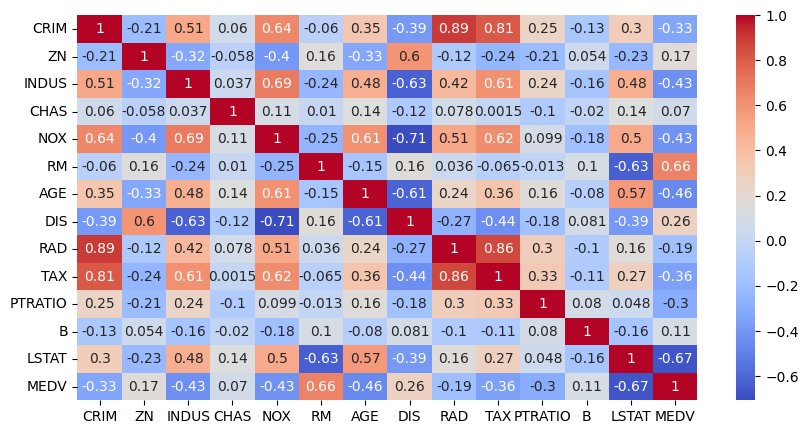

In [90]:
plt.figure(figsize=(10, 5))
cm= df.corr()
sns.heatmap(cm, annot=True, cmap='coolwarm')
cm

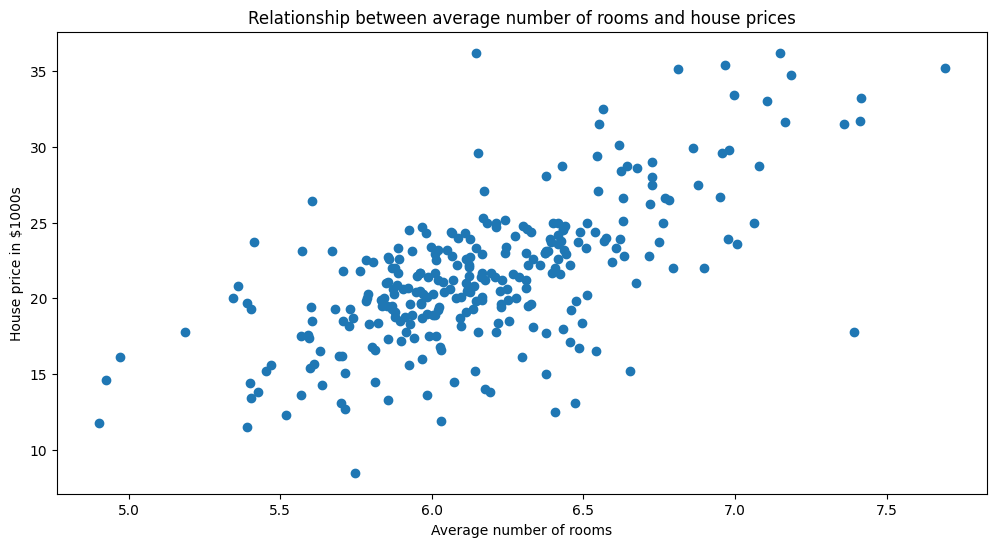

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['RM'], df['MEDV'])
ax.set_xlabel('Average number of rooms')
ax.set_ylabel('House price in $1000s')
ax.set_title('Relationship between average number of rooms and house prices')
plt.show()

### 8. Encoding Categorical Variables
**Observation:**
*   The dataset contains only numerical features (`float64` and `int64`).
*   **`CHAS`**: This is a binary categorical variable (0 or 1), so it is already in a machine-readable format.
*   **`RAD`**: This represents an index of accessibility to radial highways. While categorical in nature, it is ordinal (the values have a meaningful order), so preserving it as a numerical value is appropriate for most regression models.

**Conclusion:**
No explicit One-Hot Encoding is required for this dataset.

### 9. Feature Scaling

##### Feature scaling in Python is a crucial data preprocessing step. It involves transforming numerical features to a common scale, preventing features with larger magnitudes from dominating algorithms that rely on distance metrics or gradient descent.

##### Standardization
- Transform data to have a mean of 0 and a standard deviation of 1.
- Formula: $$X_{scaled} = \frac{X - \mu}{\sigma}$$
Where $\mu$ is the mean and $\sigma$ is the standard deviation.

General steps:

- Fit the scaler to your training data using the fit( ) method. This step calculates the necessary parameters (min/max for MinMaxScaler, mean/std for StandardScaler).

- Transform your training data and test data using the transform( ) method. It is crucial to fit only on training data and then transform both training and test data using the same fitted scaler to prevent data leakage. The fit_transform( ) method can be used as a shortcut for fitting and transforming the training data in one step.

In [92]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
print(scaled_df)

[[-0.52718466  1.66445714 -1.34922361 ...  0.70710914 -1.32018438
   0.53359187]
 [-0.516632   -0.44650208 -0.58631288 ...  0.70710914 -0.55766124
   0.02382172]
 [-0.51664205 -0.44650208 -0.58631288 ...  0.34200972 -1.49431827
   2.80631711]
 ...
 [-0.49981511 -0.44650208  0.19262539 ...  0.70710914 -1.19920715
   0.51235145]
 [-0.47526598 -0.44650208  0.19262539 ...  0.39762683 -1.04523613
   0.10878342]
 [-0.50652678 -0.44650208  0.19262539 ...  0.70710914 -0.78861777
  -2.03649929]]
